# **Load Libraries And Data**

In [1]:
'''import my libraries '''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings 
warnings.filterwarnings('ignore')

In [2]:
'''load training dataset'''
train_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv') 
test_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
Sub = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

**Aggregate data into a single file
for easy handling in analysis and cleaning**

In [3]:
Sub = Sub.drop(['Id'],axis =1)
test_df =pd.concat([test_df,Sub],axis = 1)
df = pd.concat([train_df,test_df],axis =0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180052.854647
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,57381.565721
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,154795.084126
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,176734.841494
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,191895.744157
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


**missing data**

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

**drop some useless data**

In [6]:
lis=['MiscFeature','Fence','PoolQC','Alley','BsmtFinSF2','3SsnPorch','MiscVal','LowQualFinSF','BsmtHalfBath']
df= df.drop(lis ,axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,61,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,298,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,42,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,35,272,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,192,84,0,0,0,12,2008,WD,Normal,250000.0


# **EDA**

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>],
       [<AxesSubplot:title={'center':'BedroomAbvGr'}>,
  

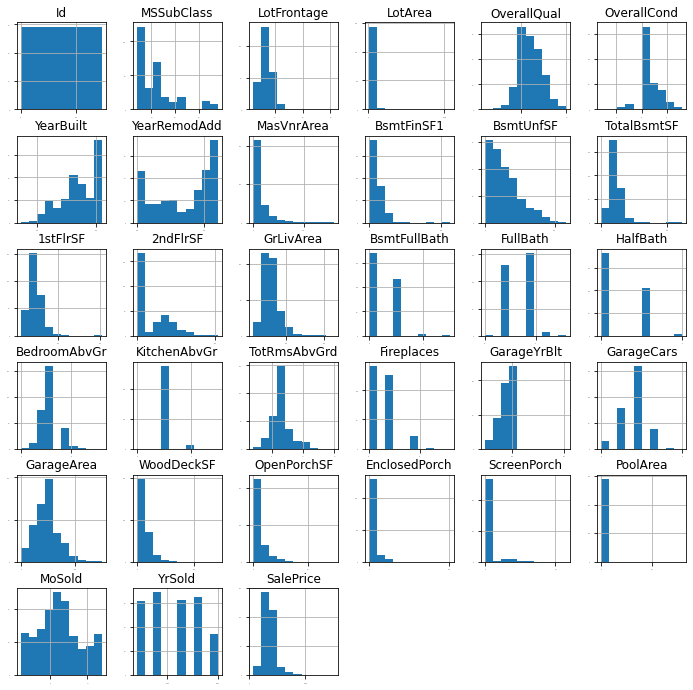

In [7]:
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))

In [8]:
df['SalePrice'].describe()

count      2919.000000
mean     180052.854647
std       57381.565721
min       34900.000000
25%      154795.084126
50%      176734.841494
75%      191895.744157
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

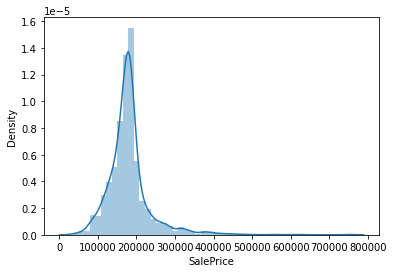

In [9]:
sns.distplot(df['SalePrice'])

**matrix of correlation coefficients between the features**

<AxesSubplot:>

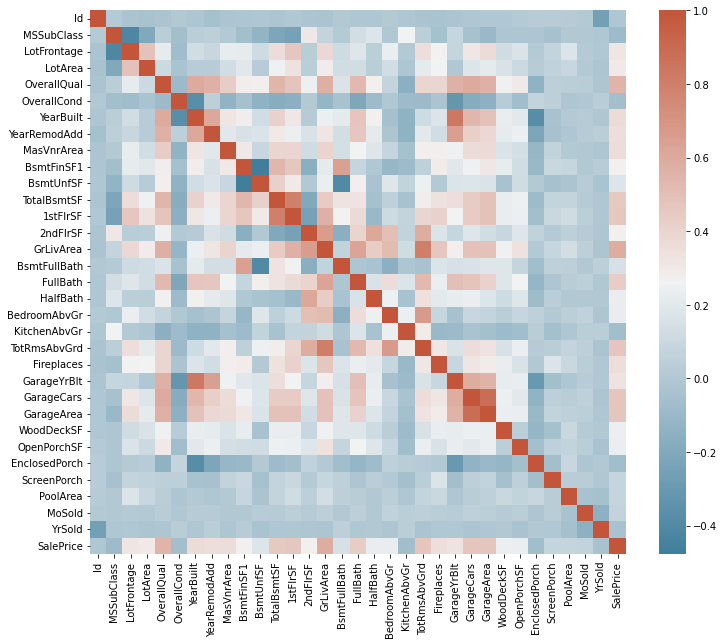

In [10]:
corr_matrix = df.corr()
corr_mat = df.drop('Id',axis=1).corr()
f, ax = plt.subplots(figsize=(12, 10)) 
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
sns.heatmap(corr_matrix, annot=None ,cmap=cmap)

# **Feature ENG**

In [11]:
df.corr()['SalePrice'].abs()

Id               0.011630
MSSubClass       0.087910
LotFrontage      0.318084
LotArea          0.296497
OverallQual      0.550911
OverallCond      0.065785
YearBuilt        0.362066
YearRemodAdd     0.350032
MasVnrArea       0.355608
BsmtFinSF1       0.272202
BsmtUnfSF        0.175195
TotalBsmtSF      0.453224
1stFlrSF         0.462865
2ndFlrSF         0.272140
GrLivArea        0.588010
BsmtFullBath     0.148210
FullBath         0.433710
HalfBath         0.228837
BedroomAbvGr     0.229611
KitchenAbvGr     0.071760
TotRmsAbvGrd     0.469800
Fireplaces       0.353567
GarageYrBlt      0.325297
GarageCars       0.469249
GarageArea       0.464809
WoodDeckSF       0.238381
OpenPorchSF      0.236376
EnclosedPorch    0.070698
ScreenPorch      0.082308
PoolArea         0.081039
MoSold           0.067222
YrSold           0.039064
SalePrice        1.000000
Name: SalePrice, dtype: float64

**The 5 highest correlation rates with y**

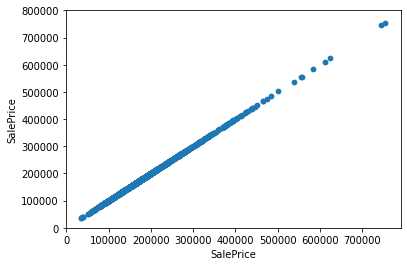

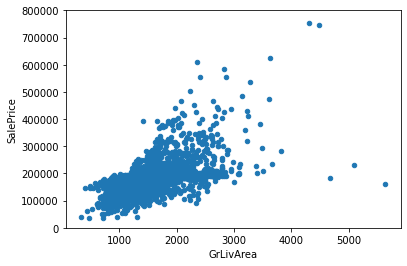

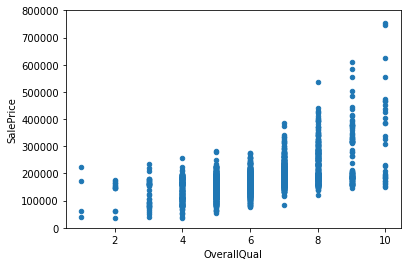

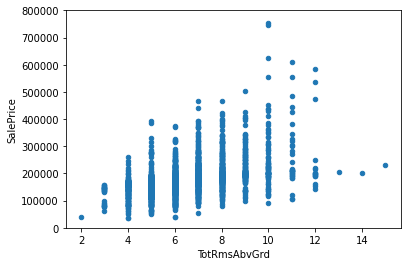

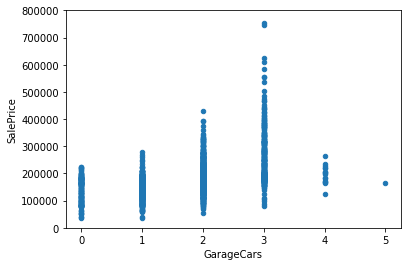

In [12]:
C = corr_matrix.nlargest(5, 'SalePrice')['SalePrice'].index
for i in C : 
    var = i
    data = pd.concat([df['SalePrice'], df[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

**drop the smallest correlation coefficients**

In [13]:
N = corr_mat.nsmallest((15),'SalePrice')['SalePrice'].index
for n in N :
    df = df.drop(n ,axis=1)

# **Clean Data**

In [14]:
cleaning = df.drop(['SalePrice'],axis = 1)
SalePrice = df['SalePrice']

**select numeric values for handling with missing data on it**

In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = cleaning.select_dtypes(include=numerics)
numeric_cols = numeric_cols.fillna(numeric_cols.mean())
numeric_cols.head()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
0,1,65.0,8450,7,2003,2003,196.0,706.0,856.0,856,1710,2,8,0,2003.0,2.0,548.0
1,2,80.0,9600,6,1976,1976,0.0,978.0,1262.0,1262,1262,2,6,1,1976.0,2.0,460.0
2,3,68.0,11250,7,2001,2002,162.0,486.0,920.0,920,1786,2,6,1,2001.0,2.0,608.0
3,4,60.0,9550,7,1915,1970,0.0,216.0,756.0,961,1717,1,7,1,1998.0,3.0,642.0
4,5,84.0,14260,8,2000,2000,350.0,655.0,1145.0,1145,2198,2,9,1,2000.0,3.0,836.0


**select categorical object values for handling with missing data on it**

In [16]:
categorical = ['object']
categorical_cols = cleaning.select_dtypes(include=categorical)
categorical_cols = categorical_cols.fillna('none')
categorical_cols = pd.get_dummies(categorical_cols )
categorical_cols.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_none,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_none,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0


**concatenate them again**

In [17]:
cleaned = pd.concat([numeric_cols,categorical_cols],axis= 1)
df = pd.concat([cleaned,SalePrice],axis = 1)

**split X ,y for Scaling**

In [18]:
tst_df = df.iloc[ 1460 : ,:-1]
X = df.iloc[:1460,:-1]
y = df.iloc[:1460,-1]


scl = Normalizer()
X = scl.fit_transform(X) 
tst_df = scl.fit_transform(tst_df)

# **Machine Learning Model**

**split X ,y into train and test**

In [19]:
X_train ,X_test ,y_train ,y_test = train_test_split(X, y , test_size = 0.3, random_state = 4)

**Linear Regression model**

In [20]:
# LN = LinearRegression()
# LN.fit(X_train,y_train)
# y_pred = LN.predict(X_test)
# LN.score(X_train, y_train)

**SGDRegressor model**

In [21]:
# SGD =SGDRegressor()
# SGD.fit(X_train,y_train)
# y_pred = SGD.predict(X_test)
# SGD.score(X_train, y_train)

**Support Victor Regression model**

In [22]:
# svr = SVR(gamma='scale', C=0.00000001, epsilon=0.2)
# svr.fit(X_train,y_train)
# y_pred = svr.predict(X_test)
# svr.score(X_train, y_train)

**Gradient Boosting Regressor ensemble model**

In [23]:
g = GradientBoostingRegressor(n_estimators = 170, learning_rate = 0.4,max_depth = 2)
train = g.fit(X_train,y_train)
score = g.score(X_train,y_train)
percentage = "{:.0%}".format(score)
y_pred = g.predict(X_test)
#print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
print('Acc_Score:',percentage)

VarScore: 0.8337056496424906
Acc_Score: 99%


# **visualization score**

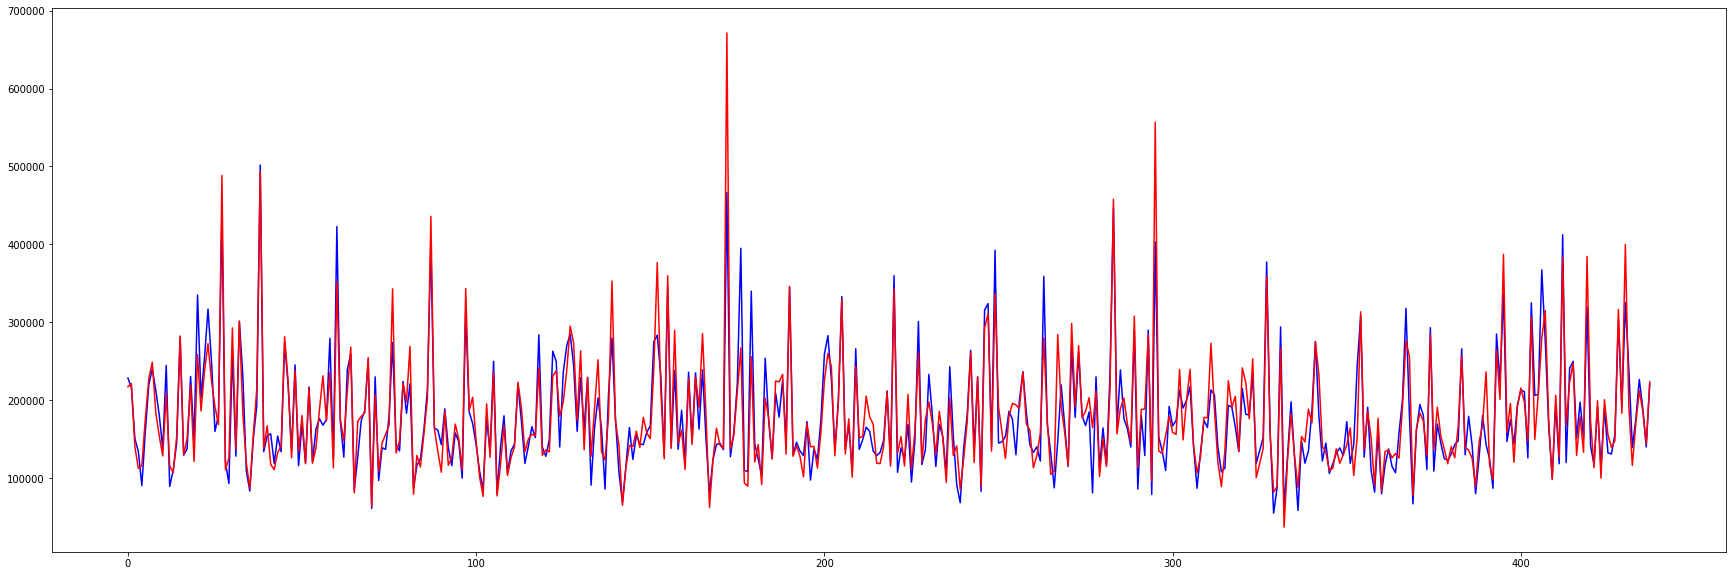

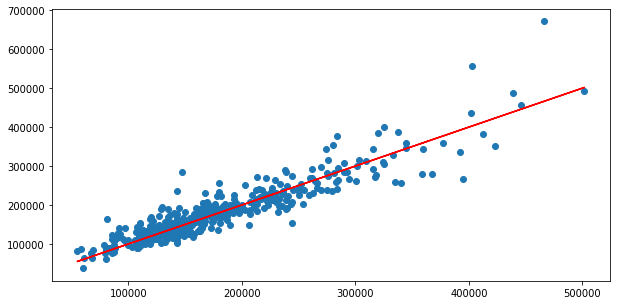

In [24]:
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(range(len(y_test)), y_test, '-b',label='Actual')
ax.plot(range(len(y_pred)), y_pred, 'r', label='Predicted')
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred) 
plt.plot(y_test,y_test,'r')
plt.show()

# **Submission**

In [25]:
y_predw = train.predict(tst_df)
Submission = pd.DataFrame({ 'Id': test_df['Id'],
                            'SalePrice': y_predw })
Submission.to_csv("Submission.csv", index=False)

In [26]:
Submission.shape

(1459, 2)